The reduced spontaneous magnetization, $\sigma_e$, of a ferromagnetic material at a given temperature $T$ can be, in a mean-field theory, determined by the implicit equation:

\begin{equation}
\sigma_e (T) = B_J \left( \frac{3J}{J+1} \frac{T_C}{T} \sigma_e \right)
\end{equation}

where the magnetic field is proportional to the magnetization, $T_C$ is the Curie temperature and $B_J(x)$ is the Brillouin function,

\begin{equation}
B_J(x) = \frac{2J+1}{2J} \coth \left( \frac{2J+1}{2J}x \right) - \frac{1}{2J} \coth \left( \frac{x}{2J} \right)
\end{equation}

1. Determine $\sigma_e (T)$ for various $J$.

2. Verify that in the limit $J \rightarrow \infty$ the Brillouin function converges to the Langevin function,

\begin{equation}
L(x) = \coth (x) - 1/x
\end{equation}

---

I define the dimensionless parameter,

\begin{align}
T' = \frac{T}{T_C}
\end{align}

and write the function in terms of this parameter.

The parameter $J$ is expected to be an integer or a half-integer, therefore only such values will be considered.

The Brillouin and Langevin functions are transcendental and must therefore be solved numerically.

The Curie Temperature is the temperature at which ferromagnets lose their magnetic properties, so it is to be expected to see this effect replicated in this computation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import approx
from IPython.display import HTML
from matplotlib import animation

In [2]:
def rootfinder(x, y, args):
    
    '''Estimating roots'''
    
    estimated_root = 0
    estimated_roots = []
    
    for i in range(len(x)-1):
        if y(x[i], *args) * y(x[i+1], *args) < 0:
            estimated_root = (x[i] + x[i+1])/2
            estimated_roots.append(estimated_root)
            
    '''Approximating root with Bolzano'''
    
    iterations = 100
    stop_condition = 1e-16
    
    dx = x[1] - x[0]
    
    x_roots = []
    errors_y = []
    
    for estimated_root in estimated_roots:
        first_point = estimated_root - dx
        second_point = estimated_root + dx
        point, error = approx.bolzano(y, estimated_root, first_point, second_point, iterations, stop_condition, args)[0:2]
        
        x_root = point[-1]
        error_y = abs(y(x_root, *args))
        
        x_roots.append(x_root)
        errors_y.append(error_y)
    
    return x_roots, errors_y

In [3]:
J = 1

lbound = -2
ubound = 2

sigma = np.linspace(lbound, ubound, 100)


BJ = lambda x, J : (2*J + 1)/(2*J) / np.tanh((2*J+1)/(2*J) * x) - 1/(2*J) / np.tanh(x/(2*J))
f = lambda sigma, T, J : -sigma + BJ( ((3*J)/(J+ 1) * 1 / T * sigma), J )
L = lambda x: 1 / np.tanh(x) - 1/x

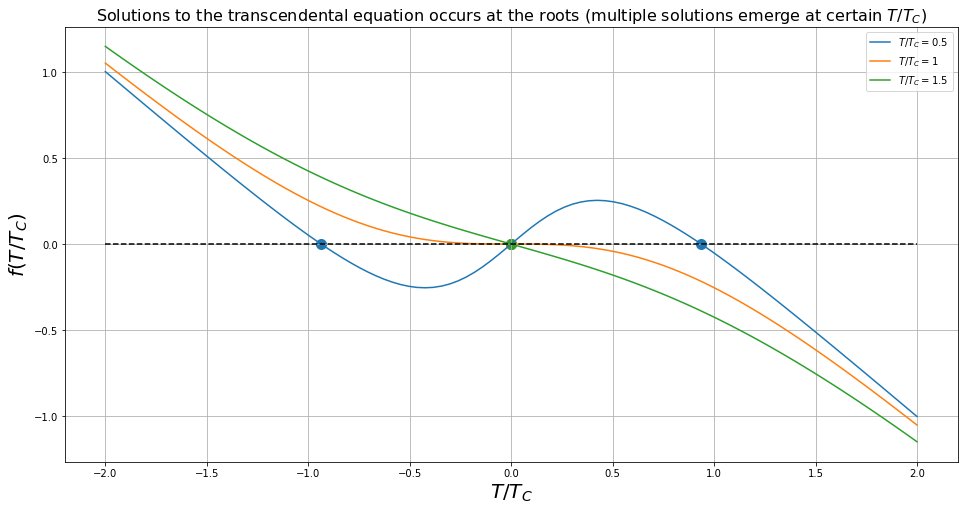

In [4]:
width, height = plt.figaspect(.5) * 2
plt.figure(figsize=(width, height))
plt.title('Solutions to the transcendental equation occurs at the roots (multiple solutions emerge at certain $T/T_C$)', 
          fontsize=16)

for T in [0.5, 1, 1.5]:
    args = [T, J]
    plt.plot(sigma, f(sigma, *args), label='$T/T_C = $' + repr(T))
    x_roots, errys_y = rootfinder(sigma, f, args)
    plt.scatter(x_roots, f(np.array(x_roots), *args), marker='o', s=100)

plt.plot([lbound, ubound], [0, 0], 'k--')
plt.xlabel('$T/T_C$', fontsize=20)
plt.ylabel('$f(T/T_C)$', fontsize=20)
plt.legend(loc='best')
plt.grid(True)
plt.show()

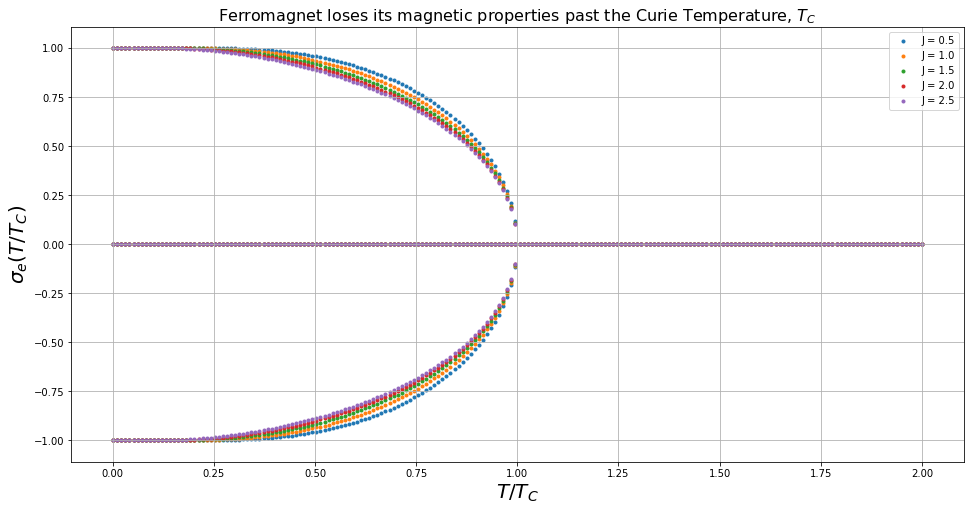

In [5]:
width, height = plt.figaspect(.5) * 2
plt.figure(figsize=(width, height))
plt.title('Ferromagnet loses its magnetic properties past the Curie Temperature, $T_C$', 
          fontsize=16)

for J in (np.arange(5) + 1) / 2:
    T_array = []
    sigma_array = []
    for T in np.linspace(0.001, 2, 200):
        args = [T, J]
        x_roots, errys_y = rootfinder(sigma, f, args)

        for i in range(len(x_roots)):
            T_array.append(T)
            sigma_array.append(x_roots[i])

    plt.scatter(T_array, sigma_array, marker='.', label='J = ' + repr(J))

plt.xlabel('$T/T_C$', fontsize=20)
plt.ylabel('$\sigma_e (T/T_C)$', fontsize=20)
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [8]:
%%capture

width, height = plt.figaspect(.5)
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111)
frames = 200

def animate(i):
    x = np.linspace(0.001, 2, 100)
    J_array = (np.arange(frames) + 1) / 2
    J = J_array[i]
    y = BJ(x, J)
    
    ax.clear()
    plt.title('Brillouin function as $J$ approaches $\infty$', fontsize=16)
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$B_J(x)$', fontsize=16)
    
    plt.ylim(0, 0.6)
    
    values = []
    
    if i > 0:
        for j in range(i):
            alpha = (1 - (frames - j + 0.75 * i)/frames * 0.5) / 2
            values.append(plt.plot(x, BJ(x, J_array[j]), 'r--', alpha = alpha))
    
    plots = [plt.plot(x, y, 'r', label='$J=$ ' + repr(J), linewidth=3.0), plt.plot(x, L(x), 'k--', label='$L(x)$')]
    
    values.append(plots)
    
    plt.legend(loc='lower right', fontsize=16)
    return values

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=100, repeat=True, repeat_delay=1000)
anim.save('Brillouin_approaching_Langevin.mp4')

In [9]:
from IPython.display import Video
Video('Brillouin_approaching_Langevin.mp4')